In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Convolution2D, Activation, Input
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')


In [8]:
# Initialize the data generator with rescaling
datagen = ImageDataGenerator(rescale=1./255)

# Assuming you want to use the same data for training and validation
train_data_dir = './llvip/dataset/infrared/train/'  # Adjust based on your actual path

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 1024),  # Resize images if necessary
    batch_size=32,
    class_mode='binary',  # Since we have two classes: person and not-person (based on folder-structure)
    shuffle=True)  # Shuffle the data


Found 12025 images belonging to 2 classes.


In [9]:
model = Sequential()

model.add(Input(shape=(128, 1024, 3)))
model.add(Convolution2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# compile model and initialize weights
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
#model.summary()

In [11]:
#history = model.fit(
#    train_generator,
#    epochs=1,  # Number of epochs to train for
#    steps_per_epoch=train_generator.n // train_generator.batch_size
#)

/Users/peterfust/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ━━━━━━━━━━━━━━━━━━━━ 181s 481ms/step - accuracy: 0.9825 - loss: 0.0331


KeyError: 'val_accuracy'

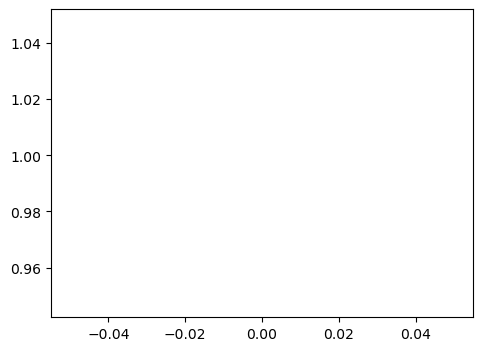

In [12]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right');